<a href="https://colab.research.google.com/github/noornabeelak/noornabeelak/blob/main/Qlearning_with_gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Q-Learning: Solving Gridworld

#Objective
This notebook will focus on defining the Q-learning algorithm, implementing it, and visualizing how the agent learns the optimal policy.

Sections Outline:
Introduction to Q-Learning:

- Brief explanation of Q-learning, states, actions, rewards, and Q-values.

Overview of the environment (Gridworld).

Setup:

Install necessary libraries.

- `!pip install numpy matplotlib`

Import the necessary modules.


```
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

```


Define the Gridworld Environment:

- Create a simple grid environment where the agent can move up, down, left, or right.
- Include obstacles and a goal state.

Implement Q-Learning:

- Initialize the Q-table for storing state-action values.
- Implement the Q-learning algorithm, covering concepts like:
- Exploration vs. Exploitation (ε-greedy strategy).

Q-value update rule:

- Parameters: learning rate (α), discount factor (γ), exploration rate (ε).
Training the Agent:

- Write a loop to train the agent for a fixed number of episodes.
Print the Q-table at intervals to show the learning process.

Visualizing the Policy:

- After training, visualize the policy the agent has learned by plotting the arrows in the grid showing the best action from each state.

Experimentation:

- Try to modify parameters (α, γ, ε) to see how learning changes.
Discuss the limitations of Q-learning in more complex environments.


In [ ]:
# Install necessary libraries (if not already installed)
!pip install numpy matplotlib

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

Episode: 500/500, Epsilon: 0.10
Learned Policy:
→ → → ↓ ↓
→ → → ↓ ↓
↓ ↓ X → ↓
→ → ↓ X ↓
→ → → → G


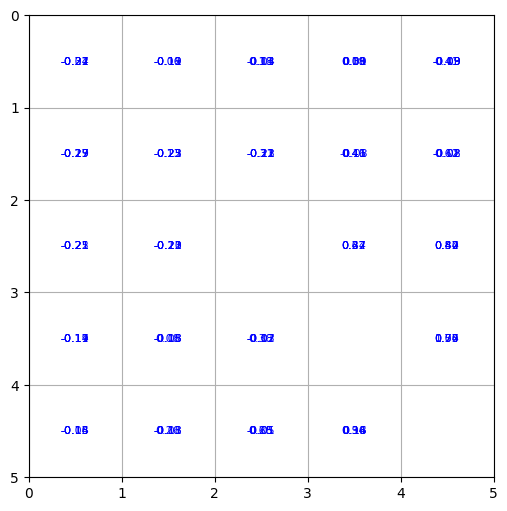

In [ ]:
# Define the Gridworld environment
class GridWorld:
    def __init__(self, grid_size=(5, 5), start=(0, 0), goal=(4, 4), obstacles=[]):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self.agent_pos

    def step(self, action):
        # Define possible actions: 0 = up, 1 = right, 2 = down, 3 = left
        moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        next_pos = (self.agent_pos[0] + moves[action][0], self.agent_pos[1] + moves[action][1])

        # Check boundaries
        if (0 <= next_pos[0] < self.grid_size[0] and 0 <= next_pos[1] < self.grid_size[1]) and next_pos not in self.obstacles:
            self.agent_pos = next_pos

        # Check if goal is reached
        if self.agent_pos == self.goal:
            return self.agent_pos, 1, True  # reward = 1, done = True
        else:
            return self.agent_pos, -0.1, False  # small penalty to encourage shortest path

    def is_done(self):
        return self.agent_pos == self.goal

# Q-learning parameters
alpha = 0.1        # Learning rate
gamma = 0.9        # Discount factor
epsilon = 1.0      # Exploration rate
epsilon_min = 0.1  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for exploration probability

# Initialize the environment
env = GridWorld(grid_size=(5, 5), start=(0, 0), goal=(4, 4), obstacles=[(2, 2), (3, 3)])
q_table = np.zeros(env.grid_size + (4,))  # Q-table with 4 actions (up, right, down, left)

# Q-learning algorithm
def q_learning(env, num_episodes=500):
    global epsilon
    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # Choose action using epsilon-greedy strategy
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.choice(4)  # Random action
            else:
                action = np.argmax(q_table[state])  # Greedy action from Q-table

            # Take action, get next state and reward
            next_state, reward, done = env.step(action)

            # Q-value update
            best_next_action = np.argmax(q_table[next_state])
            q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

            # Move to next state
            state = next_state

        # Decay epsilon to reduce exploration over time
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        # Optional: Display progress
        if (episode + 1) % 100 == 0:
            clear_output(wait=True)
            print(f'Episode: {episode + 1}/{num_episodes}, Epsilon: {epsilon:.2f}')

# Visualize the learned policy
def visualize_policy(env):
    policy_grid = np.zeros(env.grid_size, dtype=str)
    action_symbols = ['↑', '→', '↓', '←']

    for i in range(env.grid_size[0]):
        for j in range(env.grid_size[1]):
            if (i, j) == env.goal:
                policy_grid[i, j] = 'G'  # Goal
            elif (i, j) in env.obstacles:
                policy_grid[i, j] = 'X'  # Obstacle
            else:
                best_action = np.argmax(q_table[(i, j)])
                policy_grid[i, j] = action_symbols[best_action]

    print('Learned Policy:')
    for row in policy_grid:
        print(' '.join(row))

# Training the agent
q_learning(env, num_episodes=500)

# Visualizing the learned policy
visualize_policy(env)

# Plotting the Q-values for each state
def plot_q_values():
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(env.grid_size[0]):
        for j in range(env.grid_size[1]):
            if (i, j) != env.goal and (i, j) not in env.obstacles:
                for action in range(4):
                    ax.text(j + 0.5, i + 0.5, f'{q_table[i, j, action]:.2f}',
                            ha='center', va='center', color='blue', fontsize=8)

    # Drawing grid
    ax.set_xticks(np.arange(0, env.grid_size[1] + 1))
    ax.set_yticks(np.arange(0, env.grid_size[0] + 1))
    ax.grid(True)
    ax.invert_yaxis()
    plt.show()

plot_q_values()


#For further exploration

Next Steps:

- Experiment: Modify the parameters (alpha, gamma, epsilon) and observe changes in the learned policy.
- Add Obstacles: Change the obstacles parameter in the GridWorld initialization to see how the agent navigates around them.
- Extend the Environment: Create larger grids or different reward structures to explore more complex policies.